# 1️⃣  <span style = 'background-color: lightgreen ; color:black'>**library 및 data load**</span>

In [1]:
# library load

## 분석 툴
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 시각화 툴
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

##한글설정
# [참고](https://itisik.tistory.com/114)
import matplotlib.font_manager as fm

font_dirs = ['/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# data load
train = pd.read_csv('data/train.csv') # 모델 학습 파일
test = pd.read_csv('data/test.csv') # 모델 시험지 파일
submission = pd.read_csv('data/submission.csv') #답안지 파일 ; 제출 파일 형식

In [5]:
tr_cols = train.columns.values
te_cols = test.columns.values
sub_cols = submission.columns.values

f'train cols 길이: {len(tr_cols)}'
f'test cols 길이: {len(te_cols)}'
f'submission cols 길이: {len(sub_cols)}'

f'train data에는 있고 test data에는 없는 col: {set(tr_cols) - set(te_cols)}'

'train cols 길이: 11'

'test cols 길이: 10'

'submission cols 길이: 2'

"train data에는 있고 test data에는 없는 col: {'count'}"

# NaN 처리

In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [11]:
train[train['hour_bef_temperature'].isna()] # 사용할 열에 대한 na 있는 행 data확인

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

<AxesSubplot:xlabel='hour'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


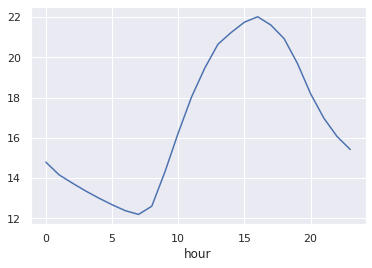

In [12]:
train.groupby('hour')['hour_bef_temperature'].mean()
train.groupby('hour')['hour_bef_temperature'].mean().plot()

In [13]:
train['hour_bef_temperature'].fillna({934: 14.788136, 1035: 20.926667}, inplace = True) # {index: 해당 위치에 넣어주고 싶은 값}
# .fillna()덮어쓰기 안됨., 무조건 0으로 채울게 아니라 각 피쳐별 특징에 따라 채워넣기

<AxesSubplot:xlabel='hour'>

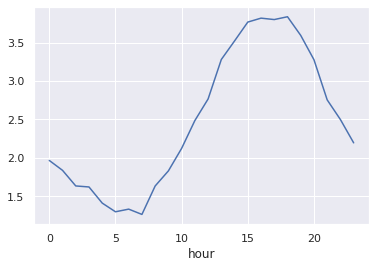

In [14]:
# train.head()
train.groupby('hour')['hour_bef_windspeed'].mean().plot()
win_gb = train.groupby('hour')['hour_bef_windspeed'].mean()

In [15]:
train[train['hour_bef_windspeed'].isna()]
# train[train['hour_bef_windspeed'].isna()].hour.values
# train[train['hour_bef_windspeed'].isna()].hour
# train[train['hour_bef_windspeed'].isna()].index

dic_win_na = {} # na일 때 idx : hour
for i in range(len(train[train['hour_bef_windspeed'].isna()])):
    
    dic_win_na[train[train['hour_bef_windspeed'].isna()].index[i]] = train[train['hour_bef_windspeed'].isna()].hour.iloc[i]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [16]:
# win_gb

In [17]:
dic_win_na
dic_m_win = {} # na일 때 idx: 그 시간의 평균 windspeed
for i,j in dic_win_na.items():
    dic_m_win[i] = win_gb[j]

{18: 13, 244: 1, 260: 3, 376: 0, 780: 20, 934: 0, 1035: 18, 1138: 12, 1229: 2}

In [18]:
train['hour_bef_windspeed'].fillna(dic_m_win, inplace = True)

In [19]:
train.isnull().sum() # temp, wind만 이용할 것이므로 그것들만 결측치가 없으면 됨

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

# test에 대해서도 NaN 처리

In [39]:
te_tem_na = test[test['hour_bef_temperature'].isna()]
dic_te_tem_na = {} # na일 때 idx : hour
for i in range(len(te_tem_na.hour)):
    dic_te_tem_na[te_tem_na.index[i]] = te_tem_na.hour.iloc[i]
te_tem_na
dic_te_tem_na

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{653: 19}

In [40]:
te_win_na = test[test['hour_bef_windspeed'].isna()]
dic_te_win_na = {} # na일 때 idx : hour
for i in range(len(te_win_na.hour)):
    dic_te_win_na[te_win_na.index[i]] = te_win_na.hour.iloc[i]
te_win_na
dic_te_win_na

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{653: 19}

In [41]:
te_tem_gb = test.groupby('hour')['hour_bef_temperature'].mean()
te_win_gb = test.groupby('hour')['hour_bef_windspeed'].mean()

In [42]:
dic_m_te_tem = {} # na일 때 idx: 그 시간의 평균 windspeed
for i,j in dic_te_tem_na.items():
    dic_m_te_tem[i] = te_tem_gb[j]

dic_m_te_win = {}
for i,j in dic_te_win_na.items():
    dic_m_te_win[i] = te_win_gb[j]

In [43]:
test['hour_bef_temperature'].fillna(dic_m_te_tem, inplace = True)
test['hour_bef_windspeed'].fillna(dic_m_te_win, inplace = True)

In [47]:
test[test['hour_bef_temperature'].isnull()]
test[test['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    715 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      715 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB
